## QATAR WAORLD CUP 2022 FINAL TWEETS SENTIMENTS ANALYSIS, Argentina VS France

### Sentiments Analysis done by [Philip Mwema](https://github.com/mwemaphil)

With the **World Cup** being the most famous and infamous sports tournament in the world, the **22nd** edition was to be hosted by Qatar, a small Middle Eastern country with a mighty economy where petroleum and natural gas are it's cornerstone.

After a successful campaign in the month long tournament which attracted 2.45 million spectators across their ultra modern stadiums, France and Argentina fought their way to the finals, with France last editions winners.

This is a sentiment analysis of tweets during the time of the finals held on 18th December 2022.
Tweets were extracted using tweepy and stored in a dataframe before proceeding with assessing and cleaning of the data then analyzing the sentiments as either positive or negative using NaiveBayesAnalyzer Machine Learning algorithm for text-classification and creating a Wordcloud for the most used words tweeted during and after the world cup finals. 

**After providing a clean data set, it was exported to Microsoft Power Bi for further analysis and creation of better visualizations.**

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import tweepy as tw
import matplotlib.pyplot as plt
import seaborn as sb
import textblob
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import re
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

## COLLECTING THE DATA

In [31]:
#Authenticating Tweepy

consumer_key = 'HIDDEN' #Hidden the keys for security purposes.
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth, wait_on_rate_limit=True) #Called `wait_on_rate_limit=True` to try and work around the rate limit tweepy has

In [24]:
#Keywords to scrape using tweepy API

keywords = "#FIFA OR #WORLDCUP OR #QATAR 2022 OR #FifaWorldCup Final OR #FifaWorldCup OR #Qatar Final OR #QatarWorldCup OR #QatarFinal OR #WORLDCUPFINAL OR #FINAL 2022 OR #Worldcup2022"
query = keywords + " -filter:retweets AND -filter:replies" # Filtering retweets and replies to focus only on original tweets

In [18]:
#Collecting tweets and creating a dataframe of the data collected.
#Collected only Tweets only written in English Language

limit = 500000 #We tried collecting 500,000 tweets but was only able to collect 160,000 due to rate limits we ran into
tweets_data = []
backoff_counter = 1

while True:
    try:
        
        for tweet in tw.Cursor(api.search_tweets, q = query, lang='en', tweet_mode='extended').items(limit):
            tweets_data.append([tweet.id, tweet.user.screen_name, tweet.created_at, tweet.full_text, tweet.favorite_count, tweet.retweet_count, tweet.user.location])
            
            df = pd.DataFrame(tweets_data, columns = ['ID', 'Username', 'Date', 'Tweet', 'Likes', 'Retweets', 'Location'])

        break
        
    except tw.errors.TweepyException as e:
            print(e.reason)
            sleep(60*backoff_counter)
            backoff_counter += 1
            
            continue

In [6]:
#Export the dataframe to a csv format to store the tweets data
df.to_csv('tweets_data.csv')

In [3]:
#Read the data into pandas to start the Sentiment Analysis
data = pd.read_csv('tweets_data.csv')

## ASSESSING AND CLEANING THE DATA

In [4]:
#Looking for the shape of the data in terms of number of rows and columns
data.shape

(160655, 7)

In [5]:
#Checking for more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160655 entries, 0 to 160654
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        160655 non-null  float64
 1   Username  160655 non-null  object 
 2   Date      160655 non-null  object 
 3   Tweet     160655 non-null  object 
 4   Likes     160655 non-null  int64  
 5   Retweets  160655 non-null  int64  
 6   Location  115518 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [6]:
#Checking a random sample of the dataset
data.sample(5)

,ID,Username,Date,Tweet,Likes,Retweets,Location
114416,1.600000e+18,RiteshK46871485,2022-12-18 18:06:34+00:00,Appreciation tweet for #Mbappe for witnessing ...,2,0,"prayagraj , India"
158406,1.600000e+18,tigabits,2022-12-19 06:19:08+00:00,Congratulations Argentina... #WorldCup2022Win...,0,0,Calicut | Al Qusais
149598,1.600000e+18,ShathiaLfc,2022-12-18 14:52:39+00:00,2022 WORLD CUP FINAL \n#ArgentinaVsFrance \n#W...,0,0,"Teluk Intan, Perak"
74665,1.600000e+18,krishna_twiing,2022-12-18 18:32:47+00:00,This is it ! ...,2,0,"Bengaluru, India"
8876,1.600000e+18,joeyt2k,2022-12-19 06:01:18+00:00,"""Ray Hudson, Lionel Messi's father, he carved ...",0,0,"Milwaukee, WI"


### The data collected has 160,000 tweets with information on each tweet on  the user, location, the tweet itself, User ID, Date of tweet, Number of Likes and Retweet. 

> This was achieved by collecting the tweets using Tweepy API, although my initial aim was collecting 500,000 tweepy rate limit reached 160,000 and stopped there. Initially the rate limit for tweets requests is usually 900 tweets for every 15 minutes but I managed a work around by using,  ``wait_on_rate_limit = True `` when calling the API and using TweepyException to bypass any errors that arose from rate limit restrictions.

In [7]:
#Checking the data types on the 
data.dtypes

ID          float64
Username     object
Date         object
Tweet        object
Likes         int64
Retweets      int64
Location     object
dtype: object

> Date data type has an erroneous data type, shoud be datetime to be corrected next 

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
#Testing out if the type conversion worked
data.dtypes

ID                      float64
Username                 object
Date        datetime64[ns, UTC]
Tweet                    object
Likes                     int64
Retweets                  int64
Location                 object
dtype: object

In [10]:
data.isnull().sum()

ID              0
Username        0
Date            0
Tweet           0
Likes           0
Retweets        0
Location    45137
dtype: int64

> Important columns don't have null values, with only Location having null values as some users prefer not disclosing their location hence this should not be an issue, we can proceed as is.

In [11]:
data[data.duplicated()]

,ID,Username,Date,Tweet,Likes,Retweets,Location
118888,1.600000e+18,meenalkashyyap,2022-12-19 09:48:16+00:00,"FIFA World Cup 2022 Final, Argentina vs France...",0,1,NaN
118892,1.600000e+18,news31108966,2022-12-19 09:22:03+00:00,The interesting happening in FIFA World Cup 20...,0,0,NaN
118893,1.600000e+18,origination_pak,2022-12-19 09:17:07+00:00,#LionelMessi keeps creating history. He has wo...,0,0,NaN
118895,1.600000e+18,Lightlinkinfo,2022-12-19 09:14:02+00:00,Argentina won the 2022 World Cup⚽️\n\n#argenti...,0,0,"Rajkot, Gujrat, India"
118896,1.600000e+18,itsZainRajpoot,2022-12-19 09:12:38+00:00,"Just Amazing Crowed 🤩 \n\n88,966 🇦🇷 vs 🇫🇷 ⚽ W...",1,0,"Manchester, England"
...,...,...,...,...,...,...,...
160650,1.600000e+18,AdityaPimpale6,2022-12-18 02:28:18+00:00,ARG vs FRA Final: Will Messi become 'THE GOAT'...,0,0,NaN
160651,1.600000e+18,2getaticket,2022-12-18 02:23:57+00:00,"#WorldCup final sees #Messi v #Mbappé, with #Q...",0,0,London UK
160652,1.600000e+18,Nearthenet,2022-12-18 02:20:45+00:00,https://t.co/xaFgFA0dT4\n\nCroatia finishes th...,0,0,NaN
160653,1.600000e+18,TTf927,2022-12-18 02:10:38+00:00,WHO IS WINNING \n\n#WorldCup2022 #WorldCup #FI...,1,0,Fortnite


> Data has 39794 duplicates which we are going to drop inorder to have a clean data.

In [12]:
data.drop_duplicates(inplace = True)

> After dropping duplicates we remain with 120861 rows of data to do the analysis from.

In [13]:
data.shape

(120861, 7)

> Nest step is removing unwanted characters, symbols from the tweets to make it even cleaner for Analysis.
> We are going to use **REGEX** to remove therse characters as below.

In [14]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]', '', text) #Removing @mentions
    text = re.sub(r'[#:_\!/]', '', text) #Removing symbols
    text = re.sub(r'https?:\/\/\+S', '', text) #Removing hyperlinks
    text = re.sub(r'httpst', '', text)
    
    return text

#Applying the function to the Tweet Column to have clean tweet texts
data['Tweet'] = data['Tweet'].apply(clean_text)

In [44]:
data.sample(5)

,ID,Username,Date,Tweet,Likes,Retweets,Location
12993,1.600000e+18,rajksunder,2022-12-19 04:17:25+00:00,"Messi is Greatest of all time, why?.\n\nHe def...",1,0,India
26365,1.600000e+18,PatsSimp,2022-12-18 21:13:39+00:00,Lets fucking go Pats like lets fucking go haha...,0,0,Boston
116012,1.600000e+18,NRR_news,2022-12-18 18:06:04+00:00,Argentina beat France 4-2 on penalties to win ...,0,0,NaN
80060,1.600000e+18,alzena_asyfa,2022-12-18 18:26:24+00:00,"Finally Argentina, The Champion 💙🇦🇷\nFIFAWorldCup",0,0,Indonesia
40515,1.600000e+18,code_is_,2022-12-18 19:26:09+00:00,"For what it's worth, it was an entertaining Wo...",0,0,Dunder Mifflin Paper Co.


In [45]:
#Exporting the clean data to csv to save the file for future use 
data.to_csv('clean_tweets_data.csv')

## VISUALIZING THE DATA

### Sentiment Analysis
> First up is Sentiment Analysis of the tweets which is a process used to identify then classify opinions of a given text as positive or negative attitude in a given context.

> I used the NaiveBayesAnalyzer from the Textblob library as I had imported earlier

In [ ]:
def sentiment(text):
    
    text = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    
    return text.sentiment.classification

data['Sentiments'] = data['Tweet'].apply(sentiment) #Applying a new column, 'Sentiments' to store the pos, or neg sentiments

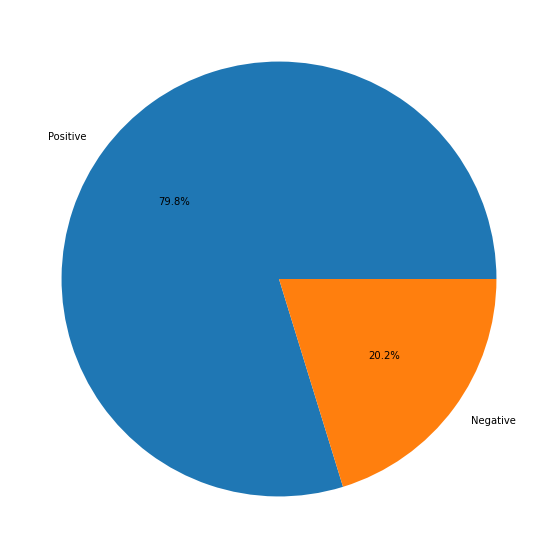

In [29]:
#Plotting a Pie Chart to visualize sentiments in terms of percentage

fig = plt.figure(figsize = (15, 10))
my_labels = ["Positive", "Negative"]
plt.pie(data['Sentiments'].value_counts(), labels = my_labels, autopct='%1.1f%%')
plt.show()

 **Observation:**  From the pie chart above, most tweets were positive, 79.8%, compared to negative with only 20.2%. 
 
 Next we will see what most of the tweets contained using wordcloud

### WordCloud Analysis

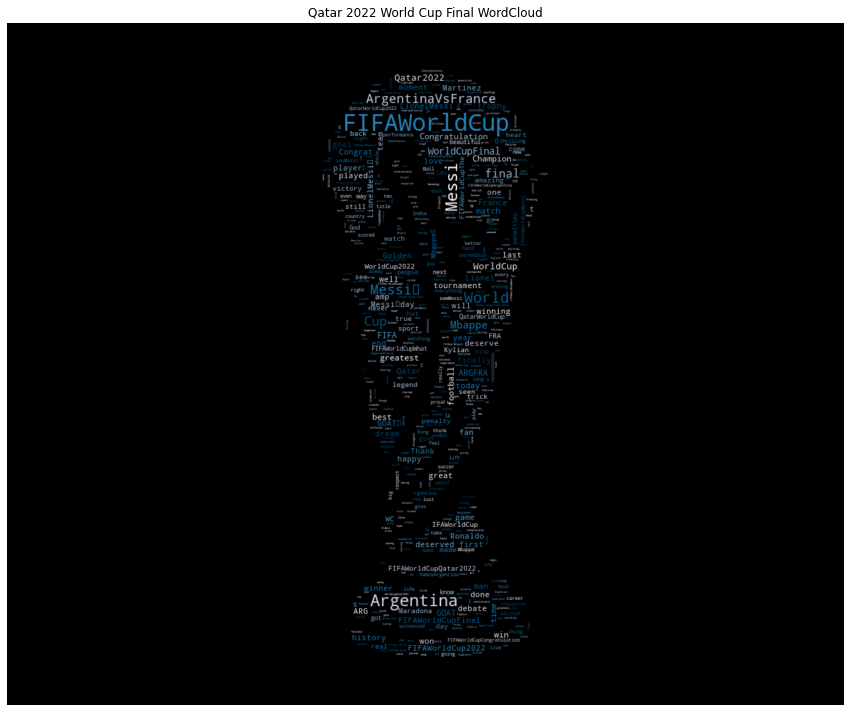

In [41]:
#imported a world cup mask photo with a white background to proceed to mask the words there

mask = np.array(Image.open('World_Cup_2022.jpg'))

allwords = ''.join(data['Tweet'])
wc = WordCloud(stopwords = STOPWORDS, 
                     background_color = "black",
                     colormap = 'PuBu',
                     collocations = False,
                     max_words = 800,
                     max_font_size = 700,
                     height = mask.shape[0],
                     width = mask.shape[1],
                     mask = mask
                     )

wc.generate(allwords)


# Create the WorldCup Figure

plt.figure(figsize = [15, 20], facecolor = 'none')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Qatar 2022 World Cup Final WordCloud")
plt.savefig("WorldCup2022_white.png", format = "png") #Save the wordcloud to my work folder
plt.show()

**Observation:** From the above wordcloud generation we can see the most tweeted words during and after the world cup

### Likes Analysis

In [47]:
likes = data.Likes.sum()
likes

4141815

**Observation** There were `4,141,815` likes in the tweets extracted

### Retweets Analysis

In [49]:
Retweets = data.Retweets.sum()
Retweets

561071

**Observation** There were `561, 071` Retweets in the tweets extracted

> ### Further Analysis was done by Microsoft Power Bi, for better visualization charts.